## 参数更新

最优化参数问题：寻找损失函数的值尽可能小的参数问题。这一小节就来看看几种关于最优化算法的。下面来看看SG(stə'kæstɪk)D,也就是随机梯度下降法。

### SGD (stochastic gradient descent)

#### SGD 随机梯度下降法原理

使用参数的梯度，沿着梯度方向更新参数，重复该步骤，从逐步的靠近的最优参数的方法。
其基础的过程公式如下：

![](imgs/1.jpg)

- $\frac{dl}{dW}$ 是损失函数关于W的梯度
- 学习率是一个超参数：决定了每一次前进的步长

下面来用个简单的类来表示：

In [1]:
class SGD:
    # 初始化给定的学习率
    def __init__(self,lr=0.01):
        self.lr = lr
    
    # params,grads 都是字典形式
    def update(self,params,grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

#### SGD的缺点

在分析SGD优化算法的缺点时，我们来看一个实际的例子，例如我们需要计算如下函数的的最小值：
$f(x,y) = \frac1{20}x^2+y^2$

我们可以大概绘制该函数的基本的图像，具体coding如下：



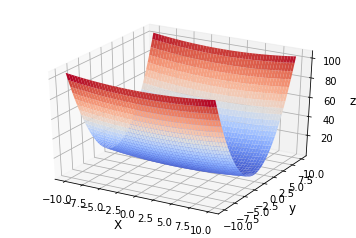

In [8]:
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax3d = fig.gca(projection='3d')

x = np.arange(-10,10,0.1)
y = np.arange(-10,10,0.1)
x, y = np.meshgrid(x, y)

z = np.power(x,2)/20 + np.power(y,2)

ax3d.set_xlabel('X', fontsize=12)
ax3d.set_ylabel('y', fontsize=12)
ax3d.set_zlabel('z', fontsize=12)

surf = ax3d.plot_surface(x, y, z,cmap=cm.coolwarm)
plt.show()

我们再来看看一个等高线的图像：
![](imgs/2.jpg)

再来看看该图像的梯度方向示意图：
![](imgs/3.jpg)

从梯度方向可以看出，y轴方向的梯度较大，x轴方向的梯度较小，而该函数的最小值是(0,0)，这样就可能导致的一个问题，当梯度的方向的基本方向是是沿着y的方向，因为y轴方向的梯度较大，缓慢的向（0，0）处移动。
SGD就会呈现一个“之”字形的移动轨迹，如下图所示。
![](imgs/4.jpg)

这样我们就可以总结SGD的缺点：
**如果优化的函数梯度方向并没有指向最小值的方向时候（函数的形状非均向），导致优化路径非常的低效。**


### Momentum

Momentum需要理解过程要加入物理的动量的理解。其公式比较简单：
![](imgs/5.jpg)

里面增加了一个变量v,可以理解为物理上的速度。其实里面只是增加了一个梯度方向的受力，在这个力下，物体的速度增加。我们可以理解类似于一个小球在曲面上滚动。
![](imgs/6.jpg)

该coding如下：


In [ ]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum # 动量值
        self.v = None # 速度v
        
    def update(self, params, grads):
        # 一开始设置为零
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
        
        for key in params.keys():
            # v随着后面的过程会叠加进来
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

这样做的好处:
更新路径就像小球在碗中滚动一样。和 SGD 相比，我们发现“之”字形的“程度”减轻了。这是因为虽然 x 轴方向上受到的力非常小，但是
一直在同一方向上受力，所以朝同一个方向会有一定的加速。反过来，虽然 y 轴方向上受到的力很大，但是因为交互地受到正方向和反方向的力，它们会互相抵消，所以 y 轴方向上的速度不稳定。因此，和 SGD 时的情形相比，可以更快地朝 x轴方向靠近，减弱“之”字形的变动程度。

![](imgs/7.jpg)

### AdaGrad

关于学习率，我们需要了解的是，学习率过小，会导致学习花费过多时间；反过来，学习率过大，则会导致学习发散而不能正确进行。  

这里就提出一种自适应学习率的算法：为参数的每个元素适当地调整学习率，与此同时进行学习.
其公式如下：
![](imgs/8.jpg)

- 变量h:它保存了以前的所有梯度值的平方和
- 在更新参数时，通过乘以，就可以调整学习的尺度、
- 参数的元素中变动较大（被大幅更新）的元素的学习率将变小

其coding如下：


In [ ]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
    def update(self, params, grads):
        if self.h is None:
        self.h = {}
        for key, val in params.items():
            self.h[key] = np.zeros_like(val)
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

基于 AdaGrad 的最优化的更新路径，如下图所示：
![](imgs/9.jpg)

函数的取值高效地向着最小值移动。由于 y 轴方向上的梯度较大，因此刚开始变动较大，但是后面会根据这个较大的变动按比例进行调整，减小更新的步伐。因此，y 轴方向上的更新程度被减弱，“之”字形的变动程度有所衰减。

### Adam

Adam是深度学习优化算法中使用最为常见的一种算法，该算法就是融合了
Momentum 和 AdaGrad 的方法.通过组合前面两个方法的优点，有望实现参数空间的高效搜索。此外，进行超参数的“偏置校正”也是 Adam 的特征。
其效果如下图所示：

![](imgs/10.jpg)

由于该算法稍微复杂，这里不做过多介绍。

### 如何选择不同的优化方法

上面的几种方法中并不存在能在所有问题中都表现良好的方法。这
4 种方法各有各的特点，都有各自擅长解决的问题和不擅长解决的问题。
下图是基于MNIST针对该4中方法的介绍，实践效果：

![](imgs/11.jpg)


